# **🌱 EPOCH 비기너 세션 4주차 복습문제**



---



## **1️⃣ 'market_2017.csv' 파일과 'market_2022.csv' 파일을 불러와 상가 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
import pandas as pd
data = pd.read_csv('market_2017.csv')
data2 = pd.read_csv('market_2022.csv')
data.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,경도,위도
0,20741628,행운노래연습장,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,노래연습장 운영업,...,서울특별시,11230,동대문구,1123065000,장안1동,1123010600,장안동,1.120000e+18,127.064796,37.562441
1,20594635,유림식당,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,서울특별시,11380,은평구,1138057000,대조동,1138010600,대조동,1.140000e+18,126.924365,37.609397
2,15551341,대동석유압구정주유소,F,생활서비스,F16,주유소/충전소,F16A01,주유소,G47711,차량용 주유소 운영업,...,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1.170000e+18,127.033876,37.525321
3,20536992,이삭토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",...,서울특별시,11470,양천구,1147055000,목5동,1147010200,목동,1.150000e+18,126.878696,37.535600
4,20537010,씨유수유빨래골,D,소매,D03,종합소매점,D03A01,편의점,G47122,체인화 편의점,...,서울특별시,11305,강북구,1130561000,수유1동,1130510300,수유동,1.130000e+18,127.017944,37.630684


### (1) 2017년도에는 존재했는데 2022년도에 사라진 편의점의 개수를 출력하세요.
* Hint: count()

In [ ]:
conv_2017= set(data['상가업소번호'])
conv_2022 = set(data2['상가업소번호'])
len(conv_2017-conv_2022)

71601

### (2) 2017년과 2022년 데이터를 비교하여, 서울특별시(시도명: "서울특별시") 내에서 위치 변경이 있었던 업소들을 찾으세요. 위치 변경 여부는 경도와 위도의 변화로 판단하고, 상호명과 변화된 위치(경도, 위도) 차이를 '경도차이', '위도차이' 열을 새로 생성하여 출력하세요. (경도차이, 위도차이는 절댓값으로 출력되지 않아도 됩니다.)
* Hint: 비교 연산자 사용 (|, =! 등)

In [ ]:
merged = pd.merge(data, data2, on="상가업소번호", suffixes=("_2017", "_2022"), how="inner")
merged
moved= merged[((merged['위도_2017'] != merged['위도_2022']))| (merged['경도_2017'] != merged['경도_2022'])]
moved['위도차이'] = moved['위도_2017'] - moved['위도_2022']
moved['경도차이'] = moved['경도_2017'] - moved['경도_2022']

result = moved[['상호명_2017','위도차이','경도차이']]
result

/tmp/ipython-input-1921617694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moved['위도차이'] = moved['위도_2017'] - moved['위도_2022']
/tmp/ipython-input-1921617694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moved['경도차이'] = moved['경도_2017'] - moved['경도_2022']


,상호명_2017,위도차이,경도차이
264,Mr박의돈워리,-0.000272,1.961900e-03
301,1등공인중개사사무소,0.000184,-5.460000e-04
356,좋은집부동산,-0.000009,1.140000e-05
398,삼보상회,0.000278,-1.734000e-04
486,교촌치킨,-0.000010,-1.018000e-04
...,...,...,...
243983,휠라,-0.000324,4.500000e-06
244182,씨씨콜렉트,0.000345,2.676700e-03
244283,신세계공인중개사사무소,-0.000012,7.354000e-04
244358,보은흑염소탕,0.000054,-8.000000e-07


## **2️⃣‘movie_data.csv’ 파일을 불러와 영화 데이터를 시각화하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
data3= pd.read_csv("movies.csv")
data3.head()

,name,rating,genre,year,score,votes,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0


### (1) 아래와 같은 평점('score') 상위 10개 영화의 관객 수에 대한 수평 막대 그래프를 그리세요.
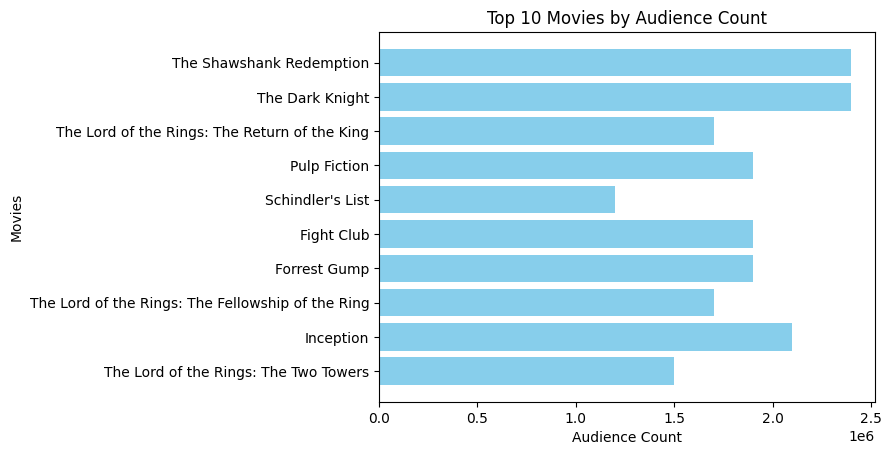

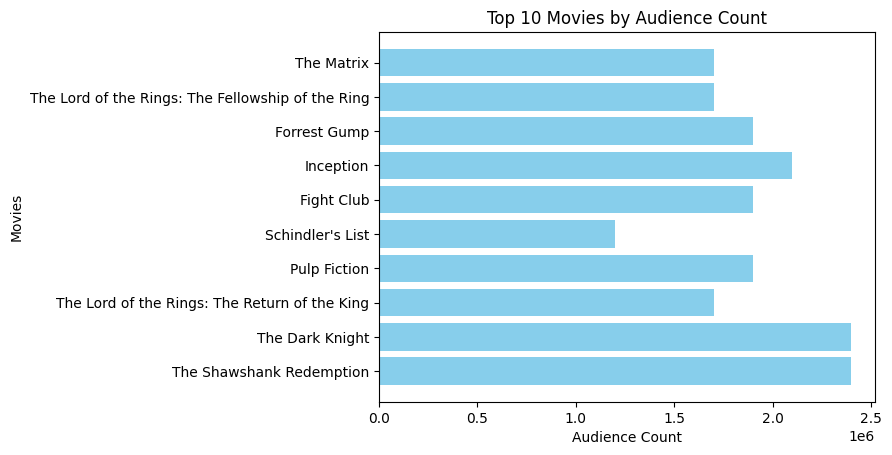

In [82]:
top_10= data3.sort_values(by = 'score', ascending=False).head(10)
top_10
import matplotlib.pyplot as plt
plt.barh(top_10['name'], top_10['votes'], color= 'skyblue')
plt.xlabel('Audience Count')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Audience Count')
plt.show()


### (2) 아래와 같이 연도('year')별 평균 예산('budget')과 수익('gross')을 선 그래프로 나타내세요.
(사용한 색상은 b, forestgreen, orange, skyblue 입니다.)

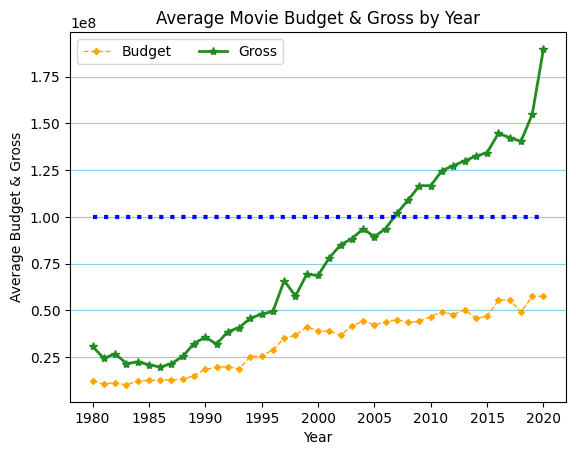

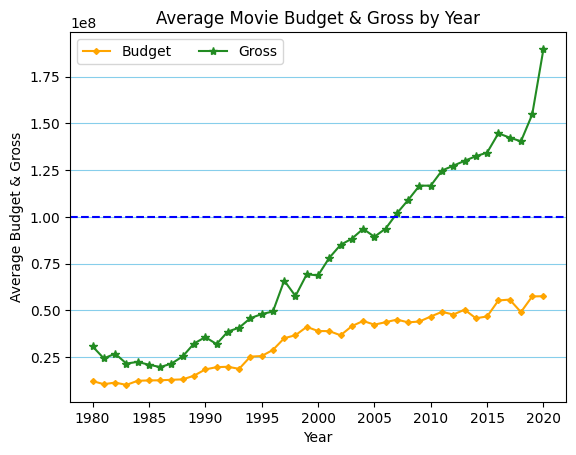

In [81]:
yearly_mean= data3.groupby(by= 'year')[['budget','gross']].mean().reset_index()
yearly_mean
plt.plot(yearly_mean['year'], yearly_mean['budget'],marker='D', markersize= 3,color= 'orange')
plt.plot(yearly_mean['year'], yearly_mean['gross'], marker='*', color= 'forestgreen')
plt.xlabel('Year')
plt.ylabel('Average Budget & Gross')
plt.title('Average Movie Budget & Gross by Year')
plt.legend(['Budget', 'Gross'], ncol=2)
plt.axhline(y=100000000, color='b', linestyle='--')
plt.grid(axis= 'y', color= 'skyblue')
plt.show()
